# **Bildbestimmung mit Neuronalen Netzen**

## Standardnetze

### Laden der Bibliotheken
**keras** ist eine Bibliothek, um komfortabel und einheitlich auf Funktionen von KI Bibliotheken zugreifen zu können, in unserem Fall auf **tensorflow**, eine von Google als Open source bereitgestellte Python Bibliothek für **Machine Learning**.  
**matplotlib** wird für die Diagramme benötigt.  
Die **MNIST** Datenbasis stellt insgesamt 70000 klassifizierte Bilder von handgeschriebenen Ziffern Verfügung, aufgeteilt in **60000 Trainingsdaten** und **10000 Verifikationsdaten**.  Die Bilder sind Graustufenbilder und 28 x 28 Pixel groß.  Bei diesen Bildern handelt es sich jeweils um gescannte Handschriftmuster von 250 Personen, von denen die Hälfte Mitarbeiter des US Census Bureau und die andere Hälfte Schüler waren. Die Verifikationsdaten wurden von 250 weiteren Personen mit der gleichen Zusammensetzung erstellt.


In [1]:
from tensorflow import keras
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.layers import Conv2D, MaxPool2D, Flatten
from keras.regularizers import l2
from keras.utils import np_utils
from keras.datasets import mnist
import matplotlib.pyplot as plt
from matplotlib.colors import SymLogNorm
import matplotlib.image as mpimg
import seaborn as sn
from sklearn.metrics import confusion_matrix
import pandas as pd
import cv2

### Laden der Trainings- und Testdaten, Formatumwandlung
Die Bilder werden in Vektoren mit der Breite 784 umgewandelt
Die Ausgangsdaten werden mit *"np_utils.to_categorical"* in einen **One Hot Vektor** umgewandelt
Die Trainingsdaten werden in Trainings- und Testdaten gesplittet. Die eigentlichen Testdaten werden später verwendet.

In [2]:
(XTrainu, YTrain), (XTestx, YTestx) = mnist.load_data()
# XTest_im = XTest.reshape(10000,28,28,1)
XTrainu = XTrainu.reshape(60000, 784)

# XTest = XTest.reshape(10000, 784)
XTrain = XTrainu/255
# XTest  = XTest/255

YTrainc = np_utils.to_categorical(YTrain,10)
# YTestc = np_utils.to_categorical(YTest,10)

Cut = 10000
XTest = XTrain[0:Cut]
XTest_im = XTrainu[0:Cut]
YTestc = YTrainc[0:Cut]
XTrain = XTrain[Cut:60000]
YTrainc =  YTrainc[Cut:60000]
XTest_im = XTest_im.reshape(10000,28,28,1)
YTest = YTrain[0:Cut]
len(XTrain)

50000

## Erstellen eines zweilagigen Neuronalen Netzes und Training der Daten

In [4]:
model = Sequential() #Definition des Neuronalen Netzes
# model.add(Dense(80,input_dim=784,activation='relu'))
# model.add(Dense(40,activation='relu'))
model.add(Dense(200,input_dim=784,activation='selu'))
model.add(Dense(40,activation='relu'))
model.add(Dense(10,activation='sigmoid'))
model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) # Erstellen des Neuronalen Netzes
history = model.fit(XTrain, YTrainc, batch_size=64, epochs=6, verbose=True, validation_data=(XTest, YTestc)) # Training der Daten und Ausgabe von Zwischenergebnissen


Epoch 1/6
782/782 [==============================] - 3s 4ms/step - loss: 0.0225 - accuracy: 0.8673 - val_loss: 0.0114 - val_accuracy: 0.9332
Epoch 2/6
782/782 [==============================] - 3s 4ms/step - loss: 0.0101 - accuracy: 0.9410 - val_loss: 0.0091 - val_accuracy: 0.9456
Epoch 3/6
782/782 [==============================] - 3s 4ms/step - loss: 0.0077 - accuracy: 0.9551 - val_loss: 0.0080 - val_accuracy: 0.9523
Epoch 4/6
782/782 [==============================] - 3s 3ms/step - loss: 0.0062 - accuracy: 0.9653 - val_loss: 0.0062 - val_accuracy: 0.9650
Epoch 5/6
782/782 [==============================] - 3s 3ms/step - loss: 0.0052 - accuracy: 0.9717 - val_loss: 0.0064 - val_accuracy: 0.9612
Epoch 6/6
782/782 [==============================] - 3s 3ms/step - loss: 0.0044 - accuracy: 0.9759 - val_loss: 0.0062 - val_accuracy: 0.9661


Bestimmung der richtig erkannten Muster

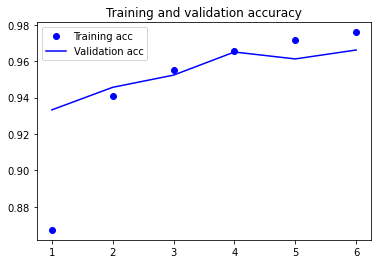

Abb 4: Anstieg der Genauigkeit über die Epochen


In [5]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.show()
print("Abb 4: Anstieg der Genauigkeit über die Epochen")


In [6]:
yP=model.predict(XTest)
y_pred = np.argmax(yP, axis=1) # Umwandlung des One Hot Vectors in Zahlen zum Vergleich
cm = confusion_matrix(YTest, y_pred)

## Erstellen einer Konfusionsmatrix / Vergleich Soll/Istwert

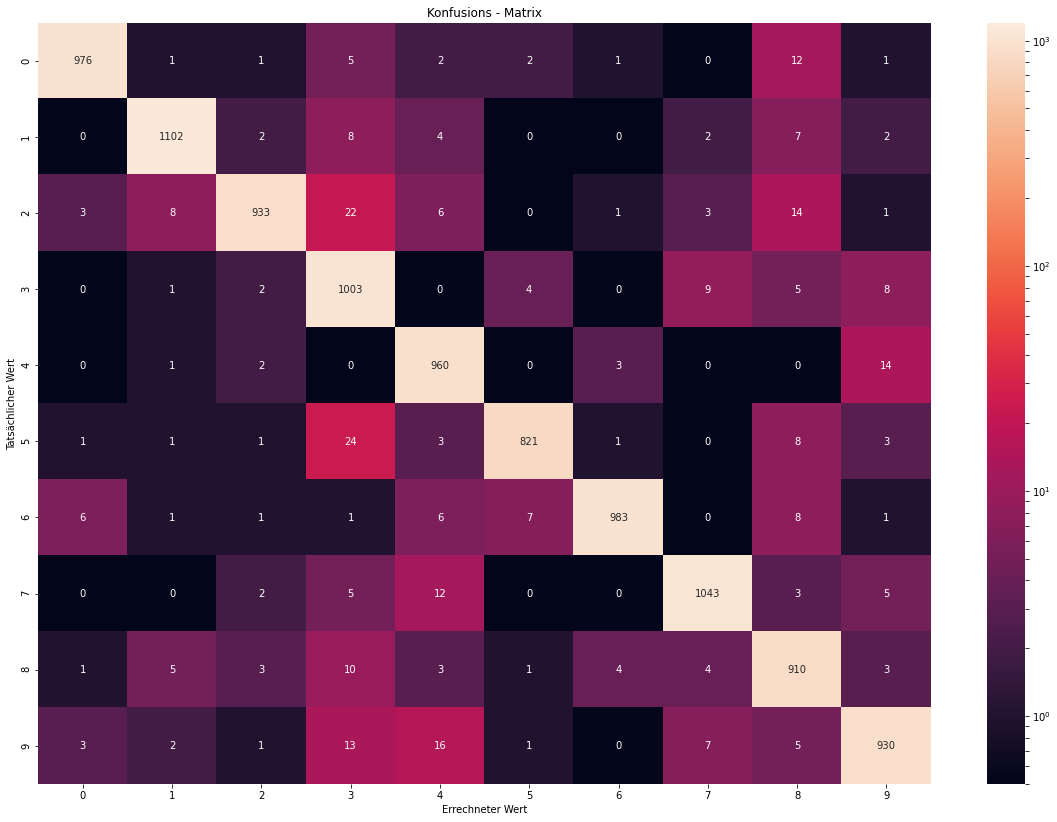

In [7]:
cm = confusion_matrix(YTest, y_pred)
df_cm = pd.DataFrame(cm, index = [i for i in "0123456789"],
                      columns = [i for i in "0123456789"])
plt.figure(figsize = (20,14))
plt.title('Konfusions - Matrix')
sn.heatmap(df_cm, annot=True, fmt="d", norm=SymLogNorm(base = 10, linthresh=0.3,vmin=0.5, vmax=1200))
 # sn.heatmap(df_cm, annot=True)
plt.ylabel('Tatsächlicher Wert'); plt.xlabel('Errechneter Wert');

## Einlesen und Auswerten eigener Bilder
Klappt nicht besonders gut.

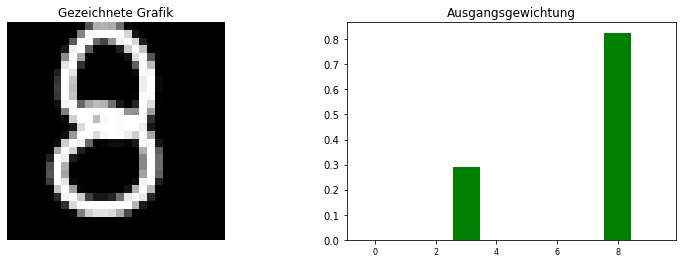

In [13]:
Filename = 'my85.png'
Pathname = r'C:\Users\ulrich.gaugler\Documents\irfan\\'
Img=mpimg.imread(Pathname+Filename)
gray = cv2.cvtColor(Img, cv2.COLOR_BGR2GRAY)
img = np.resize(gray, (28,28,1))
im2arr = np.array(img)
im2arr = im2arr.reshape(1, 784)
# im2arr = im2arr/255
yPr=model.predict(im2arr)


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 4))
#axes[0].imshow(Img,cmap='gray')
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Gezeichnete Grafik')
axes[0].set_axis_off()
axes[1].bar(range(0,10), yPr[0], 0.9,  color="green")
axes[1].tick_params(axis="x", labelsize=8, grid_alpha=1)
#axes[1].set_ylim(0.00001,1.05)
#axes[1].set_yscale('log')
axes[1].set_title('Ausgangsgewichtung');


In [16]:
Ziffer = 8
MaxAnzahlBilder = 10
AnzahlBilder = MaxAnzahlBilder
Falsch = np.nonzero(np.logical_and(YTest==Ziffer, np.argmax(yP, axis=1)-YTest) != 0)
AlleZiffer = np.nonzero(YTest==Ziffer)
Alle = np.nonzero(YTest<10)
Auswahl = Falsch
#Auswahl = AlleZiffer
#Auswahl = Alle
Auswahl = Auswahl[0]
if (MaxAnzahlBilder < np.size(Auswahl)):
    Auswahl = Auswahl[:AnzahlBilder] 
    
#XTest_im[5]

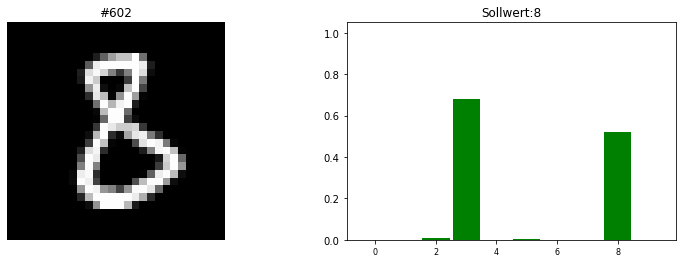

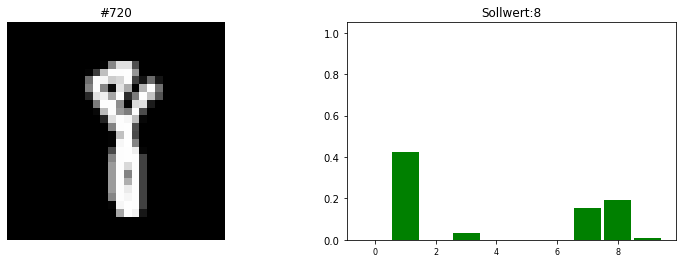

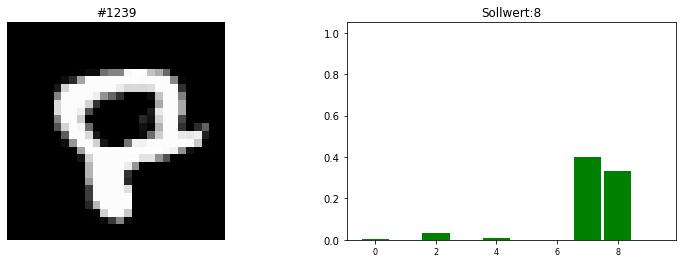

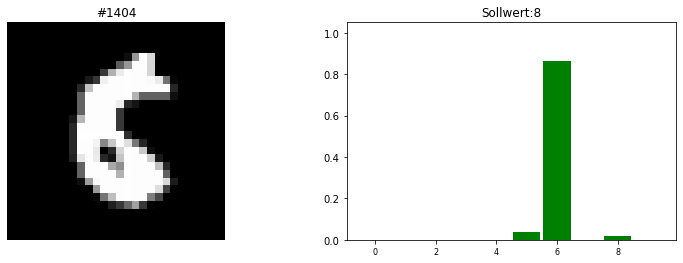

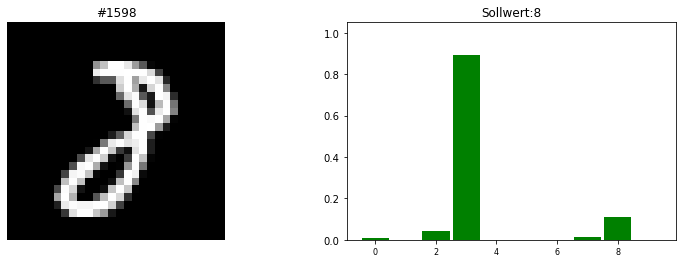

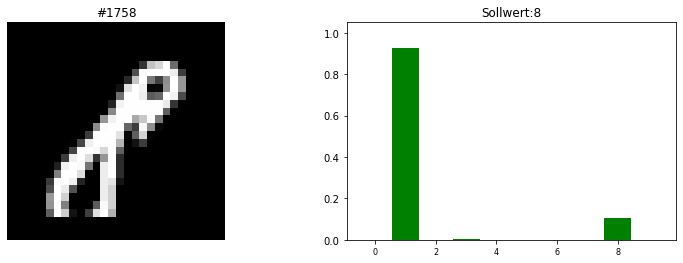

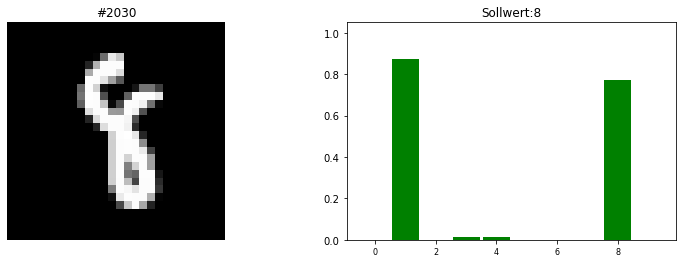

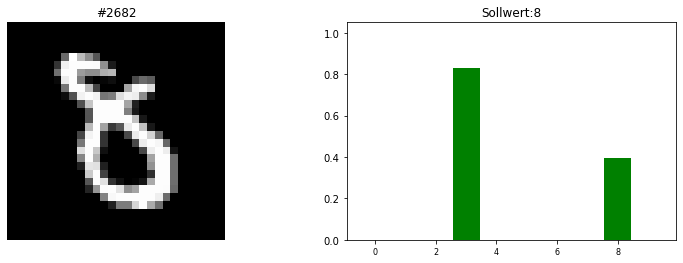

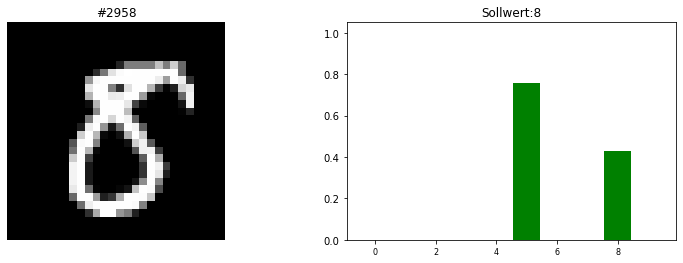

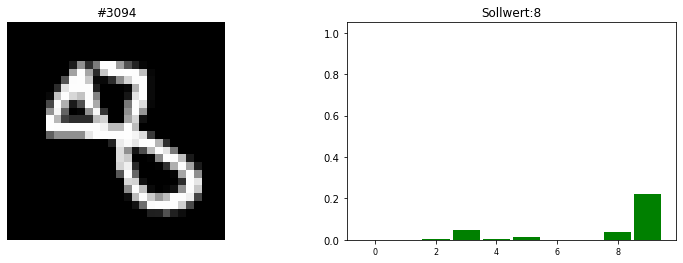

In [17]:
for si in Auswahl:
        Bildarray = XTest_im[si]
        fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(13, 4))
        axes[0].imshow(Bildarray,cmap='gray')
        axes[0].set_title('#'+str(si))
        axes[0].set_axis_off()
        axes[1].bar(range(0,10), yP[si], 0.9,  color="green")
        axes[1].tick_params(axis="x", labelsize=8, grid_alpha=1)
        axes[1].set_ylim(0.0000,1.05)
         #axes[1].set_yscale('log')
        axes[1].set_title('Sollwert:'+str(YTest[si]))
#     import matplotlib
#     matplotlib.image.imsave('Bild'+str(si)+'.png', Bildarray)
